In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!unzip '/content/drive/MyDrive/train.zip' -d 'train_data'

In [ ]:
import os
import cv2
path = "train_data/train"
X = []
y = []
paths = []

for filename in os.listdir(path):
  img_path = os.path.join(path, filename)
  paths.append(img_path)
  img = cv2.imread(img_path)
  colored_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  resized = cv2.resize(colored_img, dsize = [110, 110])
  X.append(resized)
  if 'cat' in filename:
    y.append(0)
  if 'dog' in filename:
    y.append(1)

In [ ]:
normalize = []
for element in X:
  normalize.append(element/255.0)

In [ ]:
X = np.array(normalize)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

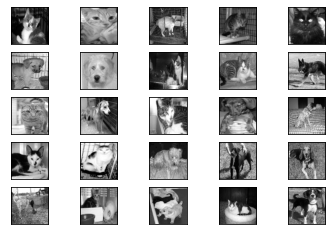

In [ ]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i],cmap='gray')
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(110, 110, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 3,
    min_delta = 0.001
)

In [ ]:
model.compile(optimizer='Adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, validation_split = 0.2  batch_size = 32, callbacks = [custom_early_stopping])

Epoch 1/13
438/438 [==============================] - 13s 18ms/step - loss: 0.6486 - accuracy: 0.6112 - val_loss: 0.6526 - val_accuracy: 0.6200
Epoch 2/13
438/438 [==============================] - 7s 16ms/step - loss: 0.5385 - accuracy: 0.7301 - val_loss: 0.4847 - val_accuracy: 0.7651
Epoch 3/13
438/438 [==============================] - 7s 16ms/step - loss: 0.4588 - accuracy: 0.7848 - val_loss: 0.4175 - val_accuracy: 0.8077
Epoch 4/13
438/438 [==============================] - 7s 16ms/step - loss: 0.3927 - accuracy: 0.8239 - val_loss: 0.3896 - val_accuracy: 0.8266
Epoch 5/13
438/438 [==============================] - 7s 16ms/step - loss: 0.3488 - accuracy: 0.8473 - val_loss: 0.3629 - val_accuracy: 0.8366
Epoch 6/13
438/438 [==============================] - 7s 16ms/step - loss: 0.3001 - accuracy: 0.8696 - val_loss: 0.3532 - val_accuracy: 0.8434
Epoch 7/13
438/438 [==============================] - 8s 18ms/step - loss: 0.2649 - accuracy: 0.8901 - val_loss: 0.3726 - val_accuracy: 0.837

235/235 - 2s - loss: 0.4354 - accuracy: 0.8552 - 2s/epoch - 7ms/step


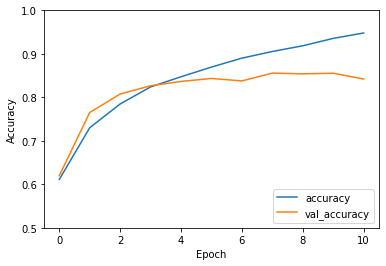

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [ ]:
results = model.evaluate(X_test, y_test, batch_size = 1)

7500/7500 [==============================] - 23s 3ms/step - loss: 0.4354 - accuracy: 0.8552
